# 3. Merging Datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
sns.set(style='ticks', font_scale=1.3)
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

## Load in Penn World Tables

Let's start by loading in the Penn World Tables Data

In [22]:
pwt = pd.read_excel('data/pwt90.xlsx', sheet_name='Data')
pwt = pwt[['year', 'countrycode', 'rgdpna', 'pop', 'hc', 'avh']].dropna()
pwt

,year,countrycode,rgdpna,pop,hc,avh
325,1950,ARG,153269.500000,17.158029,1.816503,2034.000000
326,1951,ARG,162321.859375,17.525200,1.830769,2037.866753
327,1952,ARG,152653.734375,17.884976,1.845147,2041.740856
328,1953,ARG,159095.500000,18.238994,1.859638,2045.622325
329,1954,ARG,164275.734375,18.588894,1.874243,2049.511172
330,1955,ARG,175750.109375,18.936311,1.888963,2053.407412
331,1956,ARG,180385.109375,19.280156,1.901768,2057.311059
332,1957,ARG,187317.250000,19.619336,1.914661,2061.222128
333,1958,ARG,199688.562500,19.955487,1.927641,2065.140631
334,1959,ARG,190017.765625,20.290249,1.940709,2069.066584


## Load in World Bank inequality data

Now we load in a second dataset that we wish to merge with the PWT. Here we will use the World Bank data on global inequality, which has Gini coefficient data for a larget set of countries over many years.

In [23]:
gini = pd.read_excel('data/world_bank_gini.xls')
gini

,countrycode,year,gini
0,AGO,2008,42.7
1,ALB,1996,27.0
2,ALB,2002,31.7
3,ALB,2005,30.6
4,ALB,2008,30.0
5,ALB,2012,29.0
6,ARG,1980,40.8
7,ARG,1986,42.8
8,ARG,1987,45.3
9,ARG,1991,46.8


We can see that the World Bank data doesn't appear every year for many countries.

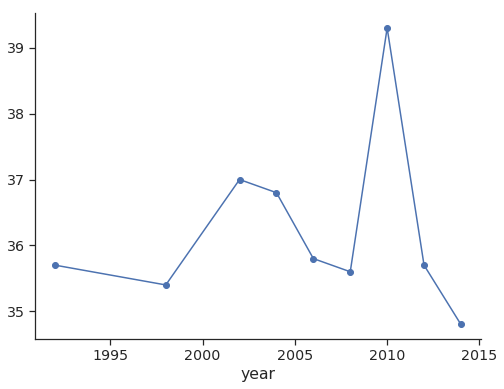

In [40]:
pan_gini = gini.pivot('year', 'countrycode')['gini']
pan_gini['VNM'].dropna().plot(marker='o');

## Merge the two together

Finally, we want to merge these two together. To do this, we will match any rows that have the same value for both `year` and `countrycode`.

In [24]:
full = pd.merge(pwt, gini, how='left', on=('year', 'countrycode'))
full

,year,countrycode,rgdpna,pop,hc,avh,gini
0,1950,ARG,153269.500000,17.158029,1.816503,2034.000000,NaN
1,1951,ARG,162321.859375,17.525200,1.830769,2037.866753,NaN
2,1952,ARG,152653.734375,17.884976,1.845147,2041.740856,NaN
3,1953,ARG,159095.500000,18.238994,1.859638,2045.622325,NaN
4,1954,ARG,164275.734375,18.588894,1.874243,2049.511172,NaN
5,1955,ARG,175750.109375,18.936311,1.888963,2053.407412,NaN
6,1956,ARG,180385.109375,19.280156,1.901768,2057.311059,NaN
7,1957,ARG,187317.250000,19.619336,1.914661,2061.222128,NaN
8,1958,ARG,199688.562500,19.955487,1.927641,2065.140631,NaN
9,1959,ARG,190017.765625,20.290249,1.940709,2069.066584,NaN


One issue is that there are many years where there is PWT data but no Gini data. We can fill these missing years in by interpolating.

In [55]:
full['gini1'] = full['gini'].interpolate()
full[['countrycode', 'year', 'gini', 'gini1']]

,countrycode,year,gini,gini1
0,ARG,1950,NaN,NaN
1,ARG,1951,NaN,NaN
2,ARG,1952,NaN,NaN
3,ARG,1953,NaN,NaN
4,ARG,1954,NaN,NaN
5,ARG,1955,NaN,NaN
6,ARG,1956,NaN,NaN
7,ARG,1957,NaN,NaN
8,ARG,1958,NaN,NaN
9,ARG,1959,NaN,NaN


Now we can see how the Gini coefficient relates to other variables, like GDP per capita

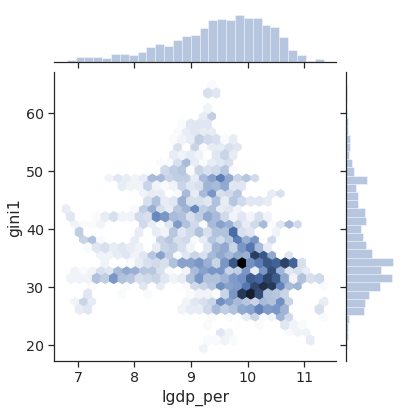

In [53]:
full['lgdp_per'] = np.log(full['rgdpna']/full['pop'])
sns.jointplot('lgdp_per', 'gini1', kind='hex', data=full);